#### Goal: read files, run fourier transform, create some baseline model 

In [30]:
import numpy as np
import torch
import torchaudio
import matplotlib.pyplot as plt
import os

import pandas as pd
import librosa
import soundfile as sf
from IPython.display import Audio

In [6]:
crema_fps = os.listdir('../data/Crema')

In [24]:
crema = pd.DataFrame(crema_fps, columns=['filename'])
crema['filename'] = crema['filename'].str.split('_')
crema = pd.DataFrame(crema['filename'].tolist(), columns=['id', 'notsure', 'emotion', 'version'])
crema

,id,notsure,emotion,version
0,1072,IEO,DIS,LO.wav
1,1039,TSI,ANG,XX.wav
2,1081,IEO,ANG,HI.wav
3,1027,TSI,ANG,XX.wav
4,1020,DFA,NEU,XX.wav
...,...,...,...,...
7437,1004,WSI,ANG,XX.wav
7438,1075,IOM,ANG,XX.wav
7439,1055,IWL,HAP,XX.wav
7440,1057,ITS,ANG,XX.wav


In [25]:
crema['filename'] = crema_fps

In [26]:
crema

,id,notsure,emotion,version,filename
0,1072,IEO,DIS,LO.wav,1072_IEO_DIS_LO.wav
1,1039,TSI,ANG,XX.wav,1039_TSI_ANG_XX.wav
2,1081,IEO,ANG,HI.wav,1081_IEO_ANG_HI.wav
3,1027,TSI,ANG,XX.wav,1027_TSI_ANG_XX.wav
4,1020,DFA,NEU,XX.wav,1020_DFA_NEU_XX.wav
...,...,...,...,...,...
7437,1004,WSI,ANG,XX.wav,1004_WSI_ANG_XX.wav
7438,1075,IOM,ANG,XX.wav,1075_IOM_ANG_XX.wav
7439,1055,IWL,HAP,XX.wav,1055_IWL_HAP_XX.wav
7440,1057,ITS,ANG,XX.wav,1057_ITS_ANG_XX.wav


In [69]:
i = 1# choose a row of the data frame
print(crema.iloc[i]['emotion'])
audio_path = os.path.join('..', 'data', 'Crema', crema['filename'].iloc[i])  # Replace with the path to your audio file
audio, sample_rate = librosa.load(audio_path, sr=None)

ANG


In [70]:
Audio(data=audio, rate=sample_rate)


In [71]:
np.unique(crema['emotion'], return_counts=True)

(array(['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'], dtype=object),
 array([1271, 1271, 1271, 1271, 1087, 1271]))

In [80]:
np.unique(crema['version'], return_counts=True)

(array(['HI.wav', 'LO.wav', 'MD.wav', 'X.wav', 'XX.wav'], dtype=object),
 array([ 455,  455,  455,    1, 6076]))

In [48]:
waveforms = []
sample_rates = []
for file in crema_fps:
    PATH = os.path.join('..', 'data', 'Crema', file)
    waveform, sample_rate = torchaudio.load(PATH)
    waveforms.append(waveform)
    sample_rates.append(sample_rate)

In [87]:
means = []
spikes_data = []
frequencies_data = []
for i in range(len(waveforms)):
    wf = waveforms[i]
    sample_rate = sample_rates[i]
    wv_arr = wf.numpy()[0]
    
    fft = np.fft.fft(wv_arr, norm='ortho')
    fs_shifted = np.linspace(-len(fft) // 2, len(fft) // 2, len(fft)) * sample_rate / len(fft)
    spikes = np.abs(np.fft.fftshift(fft))[len(fs_shifted)//2:]
    spikes_data.append(spikes)
    frequencies_data.append(fs_shifted[len(fs_shifted)//2:])
    means.append(np.mean(spikes))

In [88]:
out = []
for i in range(len(spikes_data)):
    a = np.array(spikes_data[i])
    b = np.array(frequencies_data[i])
    out.append(np.mean(a * b))

In [72]:
crema['mean'] = means

In [ ]:
crema['']

<AxesSubplot:ylabel='Frequency'>

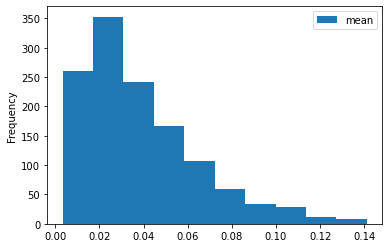

In [77]:
crema[crema['emotion'] == 'ANG'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

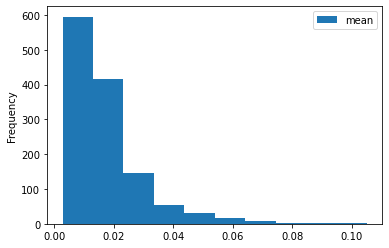

In [78]:
crema[crema['emotion'] == 'HAP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

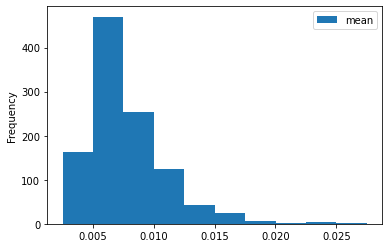

In [79]:
crema[crema['emotion'] == 'NEU'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

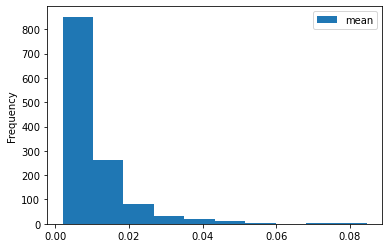

In [81]:
crema[crema['emotion'] == 'DIS'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

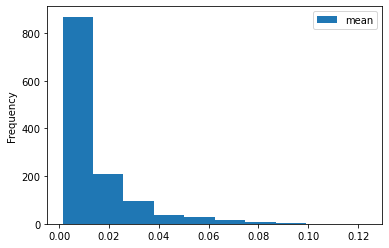

In [82]:
crema[crema['emotion'] == 'FEA'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

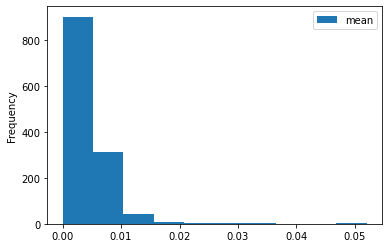

In [83]:
crema[crema['emotion'] == 'SAD'].plot(kind='hist')

In [89]:
# KNN model in time space and fourier space 
# index the frequencies with magnitudes 
# make some vector based off of the fourier transforms cluster and stuff 

# learn spectograms and short term fourier transforms !!!